# Filter a data archive to export a smaller extraction

#### EUROCONTROL R&D archive data & information can be found here: https://www.eurocontrol.int/dashboard/rnd-data-archive

#### *Traffic samples plotted here are not relevant as the data sample is just a tiny extraction of a data archive. The purpose is to show how to use the Archive class to filter your own archives*

In [1]:
%load_ext lab_black
%matplotlib inline

In [2]:
import contextily as ctx
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from archive import Archive, get_trajs, get_airspaces

#### <br> Local path of your data archive (zip file)

In [3]:
archive_path = "mysample.zip"
new_archive_filename = "my_filtered_sample.zip"

#### Load archive

In [4]:
archive = Archive(archive_path)

Loading archive:  mysample
Flights_20181201_20181231.csv.gz loaded
Flight_Points_Filed_20181201_20181231.csv.gz loaded
Flight_Points_Actual_20181201_20181231.csv.gz loaded
Flight_FIRs_Filed_20181201_20181231.csv.gz loaded
Flight_FIRs_Actual_20181201_20181231.csv.gz loaded
Flight_AUAs_Filed_20181201_20181231.csv.gz loaded
Flight_AUAs_Actual_20181201_20181231.csv.gz loaded
Route_1812.csv.gz loaded
FIR_1812.csv.gz loaded


#### <br> Apply filters

In [5]:
archive.datetime_filtering("2018-12-24 08:00:00", "2018-12-24 10:00:00")
archive.clip(["EDUUUIR", "EDVVUIR"])  # German upper airspace
archive.distance_filtering(100, 810)  # short-haul

Filtering flights from 2018-12-24 08:00:00 to 2018-12-24 10:00:00...
2769 flights remaining
Keeping flights from FIRs: ['EDUUUIR', 'EDVVUIR']...
743 flights remaining
Keeping flights with distance flown from 100 to 810...
400 flights remaining


In [6]:
archive.to_archive(new_archive_filename)

File my_filtered_sample.zip with 400 flights saved


#### <br> Load new archive

In [7]:
new_archive = Archive(new_archive_filename)
new_archive.flights_df.head()

Loading archive:  my_filtered_sample
Flights_20181201_20181231.csv.gz loaded
Flight_Points_Filed_20181201_20181231.csv.gz loaded
Flight_Points_Actual_20181201_20181231.csv.gz loaded
Flight_FIRs_Filed_20181201_20181231.csv.gz loaded
Flight_FIRs_Actual_20181201_20181231.csv.gz loaded
Flight_AUAs_Filed_20181201_20181231.csv.gz loaded
Flight_AUAs_Actual_20181201_20181231.csv.gz loaded
Route_1812.csv.gz loaded
FIR_1812.csv.gz loaded


,ECTRL ID,ADEP,ADEP Latitude,ADEP Longitude,ADES,ADES Latitude,ADES Longitude,FILED OFF BLOCK TIME,FILED ARRIVAL TIME,ACTUAL OFF BLOCK TIME,ACTUAL ARRIVAL TIME,AC Type,AC Operator,AC Registration,ICAO Flight Type,STATFOR Market Segment,Requested FL,Actual Distance Flown (nm)
0,226035765,UKBB,50.34472,30.89333,EDDM,48.35389,11.78611,2018-12-24 07:40:00,2018-12-24 10:05:27,2018-12-24 08:01:00,2018-12-24 10:16:03,B738,AUI,URPST,S,Traditional Scheduled,340.0,773
1,226035864,EDDM,48.35389,11.78611,EGCC,53.35389,-2.27500,2018-12-24 07:45:00,2018-12-24 09:50:45,2018-12-24 08:02:00,2018-12-24 10:07:42,A319,DLH,DAILY,S,Traditional Scheduled,320.0,661
2,226035899,LOWI,47.26028,11.34389,EHRD,51.95694,4.43722,2018-12-24 07:45:00,2018-12-24 09:55:07,2018-12-24 08:01:00,2018-12-24 10:13:39,C510,GAC,OEFHA,N,Business Aviation,360.0,444
3,226035935,ETNL,53.91806,12.27917,EDDM,48.35389,11.78611,2018-12-24 07:45:00,2018-12-24 08:59:19,2018-12-24 08:02:00,2018-12-24 09:04:59,E145,BMR,GRJXE,S,Traditional Scheduled,300.0,369
4,226036034,EDDF,50.03333,8.57056,LOWW,48.11028,16.56972,2018-12-24 07:50:00,2018-12-24 08:57:07,2018-12-24 08:03:00,2018-12-24 09:18:50,A319,DLH,DAILH,S,Traditional Scheduled,230.0,388


#### <br> Plot trajectories from new archive with background map

In [8]:
airspaces = get_airspaces(new_archive.firs_df)
german_firs = airspaces.loc[["EDUUUIR", "EDVVUIR"]]
trajs = get_trajs(new_archive.flight_points_actual_df)

In [9]:
figsize = (20, 20)
traj_color = "darkred"
traj_alpha = 0.1
airspace_cmap = "cool"
airspace_alpha = 0.3
ctx_zoom = 6
file_name = "filtering.png"

In [10]:
firs_3857 = german_firs.to_crs(epsg=3857)  # web mercator
trajs_3857 = trajs.to_crs(epsg=3857)
firs_3857.reset_index(inplace=True)

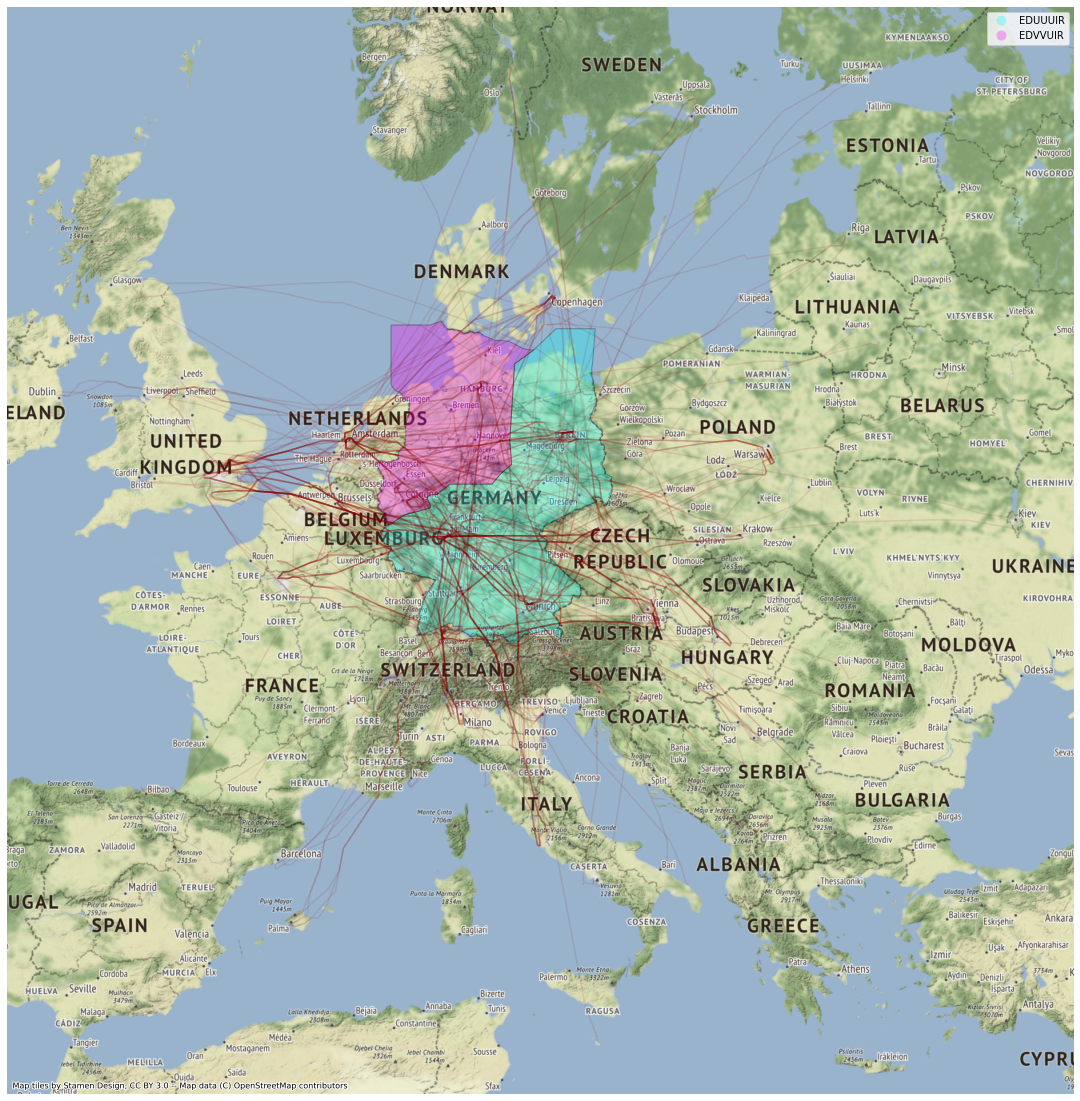

In [11]:
f, ax = plt.subplots(figsize=figsize)
firs_3857.plot(
    ax=ax,
    edgecolor="black",
    alpha=airspace_alpha,
    cmap=airspace_cmap,
    legend=True,
    column="index",
)
trajs_3857.plot(ax=ax, color=traj_color, alpha=traj_alpha)

ctx.add_basemap(ax, zoom=ctx_zoom)
ax.set_axis_off()
plt.savefig(file_name, bbox_inches="tight", pad_inches=-0.1)